# Character Generation

In [1]:
from io import open
import glob
import os
import random
import unicodedata
import string

import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [2]:
FILE_PATH = 'datasets/names/*.txt'

In [3]:
print(glob.glob(FILE_PATH))

['datasets/names\\Arabic.txt', 'datasets/names\\Chinese.txt', 'datasets/names\\Czech.txt', 'datasets/names\\Dutch.txt', 'datasets/names\\English.txt', 'datasets/names\\French.txt', 'datasets/names\\German.txt', 'datasets/names\\Greek.txt', 'datasets/names\\Irish.txt', 'datasets/names\\Italian.txt', 'datasets/names\\Japanese.txt', 'datasets/names\\Korean.txt', 'datasets/names\\Polish.txt', 'datasets/names\\Portuguese.txt', 'datasets/names\\Russian.txt', 'datasets/names\\Scottish.txt', 'datasets/names\\Spanish.txt', 'datasets/names\\Vietnamese.txt']


In [4]:
EOS = '/'

all_letters = string.ascii_letters + " .'" + EOS
n_letters = len(all_letters)

all_letters, n_letters

("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .'/", 56)

In [5]:
EOS_INDEX = n_letters -1

EOS_INDEX

55

In [6]:
def unicode_to_ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [7]:
print(unicode_to_ascii('Krol'))

Krol


In [8]:
print(unicode_to_ascii('Smolak'))

Smolak


In [9]:
print(unicode_to_ascii("O'Neal"))

O'Neal


In [10]:
def find_files(path):
    return glob.glob(path)

In [11]:
total_names = 0

language_names = {}

all_languages = []

for filename in find_files(FILE_PATH):
    
    language = os.path.splitext(os.path.basename(filename))[0]
    
    all_languages.append(language)
    
    names_in_file = open(filename, encoding='utf-8').read().strip().split('\n')
    
    names = [unicode_to_ascii(name) for name in names_in_file]
    
    language_names[language] = names
    
    total_names += len(names)

In [12]:
all_languages

['Arabic',
 'Chinese',
 'Czech',
 'Dutch',
 'English',
 'French',
 'German',
 'Greek',
 'Irish',
 'Italian',
 'Japanese',
 'Korean',
 'Polish',
 'Portuguese',
 'Russian',
 'Scottish',
 'Spanish',
 'Vietnamese']

In [13]:
n_languages = len(all_languages)
n_languages

18

In [14]:
total_names

20074

In [15]:
print(language_names['Spanish'][:5])

['Abana', 'Abano', 'Abarca', 'Abaroa', 'Abascal']


In [16]:
print(language_names['German'][-5:])

['Xylander', 'Zellweger', 'Zilberschlag', 'Zimmerman', 'Zimmermann']


In [17]:
def letter_to_tensor(letter):
    
    tensor = torch.zeros(1, n_letters)
    tensor[0][all_letters.find(letter)] = 1
    
    return tensor

In [18]:
print(letter_to_tensor('b'))

tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])


In [19]:
print(letter_to_tensor('Z'))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0.]])


In [20]:
def input_name_to_tensor(name):
    tensor = torch.zeros(len(name), 1, n_letters)
    
    for li, letter in enumerate(name):
        tensor[li][0][all_letters.find(letter)] = 1
        
    return tensor

In [21]:
anna_input_tensor = input_name_to_tensor('Anna')

anna_input_tensor.size()

torch.Size([4, 1, 56])

In [22]:
anna_input_tensor

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0

In [23]:
def target_name_to_tensor(name):
    letter_indexes = [all_letters.find(name[li]) for li in range(1, len(name))]
    
    letter_indexes.append(EOS_INDEX)
    
    return torch.LongTensor(letter_indexes)

In [24]:
target_name_to_tensor('Anna')

tensor([13, 13,  0, 55])

In [25]:
target_name_to_tensor('Simon')

tensor([ 8, 12, 14, 13, 55])

In [26]:
def language_to_tensor(language):
    li = all_languages.index(language)
    
    category_tensor = torch.zeros(1, n_languages)
    
    category_tensor[0][li] = 1
    
    return category_tensor

In [27]:
language_to_tensor('Czech')

tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [28]:
language_to_tensor('Japanese')

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [29]:
class RNN(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.hidden_size = hidden_size

        self.i2h = nn.Linear(n_languages + input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(n_languages + input_size + hidden_size, output_size)

        self.o2o = nn.Linear(hidden_size + output_size, output_size)
        
        self.dropout = nn.Dropout(0.2)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, language, input_t, hidden):

        input_combined = torch.cat((language, input_t, hidden), 1)

        hidden = self.i2h(input_combined)
        output = self.i2o(input_combined)
        
        output_combined = torch.cat((hidden, output), 1)
        
        output = self.o2o(output_combined)
        output = self.dropout(output)

        output = self.log_softmax(output)
        
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [30]:
n_hidden = 256

rnn = RNN(n_letters, n_hidden, n_letters)

In [31]:
language = language_to_tensor('English')

input_t = letter_to_tensor('S')

hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(language, input_t, hidden)

print('output size =', output.size())
print('next_hidden size =', next_hidden.size())

output size = torch.Size([1, 56])
next_hidden size = torch.Size([1, 256])


In [32]:
def letter_from_output(output):
    
    _, top_i = output.topk(1)
    
    letter_i = top_i[0].item()
    
    return all_letters[letter_i], letter_i

In [33]:
letter_from_output(output)

('p', 15)

In [34]:
def random_training_example():
    
    random_language_index = random.randint(0, n_languages - 1)
    language = all_languages[random_language_index]
    
    random_language_names = language_names[language]
    name = random_language_names[random.randint(0, len(random_language_names) - 1)]
    
    language_tensor = language_to_tensor(language)
    
    input_name_tensor = input_name_to_tensor(name)
    target_name_tensor = target_name_to_tensor(name)
    
    #print(language, name)
    
    return language_tensor, input_name_tensor, target_name_tensor

In [35]:
random_training_example()

(tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]]),
 tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0

In [36]:
random_training_example()

(tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]),
 tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0

In [37]:
criterion = nn.NLLLoss()

learning_rate = 0.0005

In [38]:
def train(language_tensor, input_name, target_name_tensor):
    
    target_name_tensor.unsqueeze_(-1)
    
    hidden = rnn.initHidden()
    
    rnn.zero_grad()
    
    loss = 0
    
    for i in range(input_name_tensor.size(0)):
        
        output, hidden = rnn(language_tensor, input_name_tensor[i], hidden)
        
        l = criterion(output, target_name_tensor[i])
        
        loss += l
        
    loss.backward()
    
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)
        
    return output, loss.item() / input_name_tensor.size(0)

In [39]:
n_iters = 200000
current_loss = 0
all_losses = []

In [40]:
for iteration in range(1, n_iters + 1):
    
    language_tensor, input_name_tensor, target_name_tensor = random_training_example()
    
    output, loss = train(language_tensor, input_name_tensor, target_name_tensor)
    current_loss += loss
    
    if iteration % 500 == 0:
        print('(%d %d%%) %.4f' % (iteration, iteration / n_iters * 100, loss))
    
    if iteration % 1000 == 0:
        all_losses.append(current_loss / 1000)
        current_loss = 0

(500 0%) 3.8494
(1000 0%) 3.8411
(1500 0%) 2.8343
(2000 1%) 3.3232
(2500 1%) 2.8422
(3000 1%) 2.8854
(3500 1%) 3.1747
(4000 2%) 3.2172
(4500 2%) 3.2271
(5000 2%) 2.7758
(5500 2%) 3.4571
(6000 3%) 2.7831
(6500 3%) 3.2079
(7000 3%) 2.7825
(7500 3%) 3.3228
(8000 4%) 3.0525
(8500 4%) 2.4416
(9000 4%) 2.8334
(9500 4%) 2.6152
(10000 5%) 3.1138
(10500 5%) 2.2153
(11000 5%) 2.8472
(11500 5%) 2.5836
(12000 6%) 3.2102
(12500 6%) 2.8964
(13000 6%) 3.4546
(13500 6%) 3.1487
(14000 7%) 2.9828
(14500 7%) 2.7322
(15000 7%) 3.0589
(15500 7%) 2.5077
(16000 8%) 3.0269
(16500 8%) 2.6722
(17000 8%) 2.5266
(17500 8%) 2.6499
(18000 9%) 2.7612
(18500 9%) 2.8138
(19000 9%) 2.5752
(19500 9%) 3.4138
(20000 10%) 1.4369
(20500 10%) 2.7384
(21000 10%) 2.5257
(21500 10%) 2.9776
(22000 11%) 2.9074
(22500 11%) 2.5167
(23000 11%) 2.5865
(23500 11%) 2.2621
(24000 12%) 2.8800
(24500 12%) 3.2396
(25000 12%) 2.8428
(25500 12%) 2.2098
(26000 13%) 2.5260
(26500 13%) 2.7889
(27000 13%) 2.4364
(27500 13%) 3.3267
(28000 14%) 2.

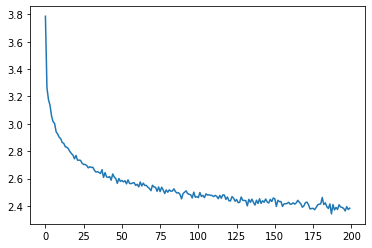

In [41]:
plt.figure()
plt.plot(all_losses)

In [42]:
MAX_LENGTH = 12

def sample(language, start_letter='A'):
    
    rnn.eval()
    
    with torch.no_grad():
        language_tensor = language_to_tensor(language)
        
        input_t = input_name_to_tensor(start_letter)
        hidden = rnn.initHidden()
        
        output_name = start_letter
        
        for i in range(MAX_LENGTH):
            
            output, hidden = rnn(language_tensor, input_t[0], hidden)
            
            letter = letter_from_output(output)[0]
            
            if letter == EOS:
                break
            else:
                output_name += letter
                
            input_t = input_name_to_tensor(letter)
        
        return output_name

In [43]:
sample('English', 'B')

'Ballen'

In [44]:
sample('English', 'E')

'Erten'

In [45]:
sample('Spanish', 'A')

'Alara'

In [46]:
sample('Russian', 'O')

"O'kouven"

In [47]:
sample('Russian', 'V')

'Vandan'

In [48]:
sample('Chinese', 'C')

'Chan'

In [49]:
sample('Korean', 'S')

'Sho'

In [50]:
sample('Japanese', 'S')

'Saka'